# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [104]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [105]:
# Create a for loop to run through each city in the cities list, creata a list to hold info for data frame
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
print(f"Beginning data retrieval")
print(f"--------------------------------")
for i,city in enumerate(cities):

# Create the URL for the corresponding city
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_weather}&units=imperial"
    
# Perform the "requests.get().json()"
    response = requests.get(url).json()
    if "main" not in response:
        print(f"City not found....Skipping")
        continue

# Get the info for the data frame (store into lists using .append)
    city_name.append(response["name"])
    latitude.append(response["coord"]["lat"])
    longitude.append(response["coord"]["lon"])
    max_temp.append(response["main"]["temp_max"])
    humidity.append(response["main"]["humidity"])
    cloudiness.append(response["clouds"]["all"])
    wind_speed.append(response["wind"]["speed"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])

# Print out the correct string "Processing Record #| city_name"
    print(f'Processing Record {i}| {city}')
print(f"--------------------------------")
print(f"Data retrieval complete")
print(f"--------------------------------")

Beginning data retrieval
--------------------------------
Processing Record 0| mount gambier
City not found....Skipping
Processing Record 2| asau
Processing Record 3| hobart
Processing Record 4| butaritari
Processing Record 5| rikitea
City not found....Skipping
Processing Record 7| kaitangata
Processing Record 8| albany
Processing Record 9| pevek
Processing Record 10| bayir
Processing Record 11| cordoba
Processing Record 12| ushuaia
Processing Record 13| sangar
Processing Record 14| atuona
Processing Record 15| qaanaaq
Processing Record 16| georgetown
Processing Record 17| atambua
Processing Record 18| fossombrone
Processing Record 19| lakes entrance
Processing Record 20| mabaruma
Processing Record 21| fortuna
Processing Record 22| saint anthony
Processing Record 23| jamestown
Processing Record 24| chuy
Processing Record 25| mataura
Processing Record 26| lazarev
Processing Record 27| tiksi
Processing Record 28| deputatskiy
Processing Record 29| port hardy
Processing Record 30| port bla

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
city_info = {"City":city_name,
             "Lat":latitude,
             "Lng":longitude,
             "Max Temp":max_temp,
             "Humidity":humidity,
             "Cloudiness":cloudiness,
             "Wind Speed":wind_speed,
             "Country":country,
             "Date":date
             }
city_df = pd.DataFrame(city_info)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.83,140.77,71.60,40,0,20.80,AU,1605082761
1,Asău,46.43,26.40,39.99,91,70,3.62,RO,1605082762
2,Hobart,-42.88,147.33,82.40,32,0,16.11,AU,1605082502
3,Butaritari,3.07,172.79,81.86,80,82,10.58,KI,1605082762
4,Rikitea,-23.12,-134.97,73.72,76,0,18.90,PF,1605082763


In [107]:
# Print out a description of the data frame using .describe()
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,17.636132,18.556185,60.049251,72.567944,52.506969,7.600976,1.605083e+09
std,32.517814,89.721957,24.062924,22.386376,39.684917,5.379293,1.018917e+02
min,-54.800000,-175.200000,-21.910000,6.000000,0.000000,0.070000,1.605082e+09
25%,-8.740000,-61.105000,45.227500,62.000000,5.000000,3.390000,1.605083e+09
50%,20.585000,21.420000,66.910000,79.000000,61.500000,6.275000,1.605083e+09
75%,43.105000,95.312500,78.800000,90.000000,90.000000,10.397500,1.605083e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,28.860000,1.605083e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [108]:
# Use loc to locate the rows that have humidity less than or equal to 100 and print out
city_low_humidity = city_df.loc[city_df["Humidity"] <= 100]
city_low_humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.83,140.77,71.60,40,0,20.80,AU,1605082761
1,Asău,46.43,26.40,39.99,91,70,3.62,RO,1605082762
2,Hobart,-42.88,147.33,82.40,32,0,16.11,AU,1605082502
3,Butaritari,3.07,172.79,81.86,80,82,10.58,KI,1605082762
4,Rikitea,-23.12,-134.97,73.72,76,0,18.90,PF,1605082763


In [109]:
#  Get the indices of cities that have humidity over 100%.
# Use the loc to locate rows that humidity greater than 100
city_high_humidity = city_df.loc[city_df["Humidity"] > 100]
city_high_humidity

# Results show that there are no cities that have humidity greater than 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [110]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Find the Q1 and Q3 of humidity, then find the upper and lower bounds, then use loc to find all the cities that have humidities between the upper and lower bounds
lower_quart = city_df.describe()["Humidity"][4]
upper_quart = city_df.describe()["Humidity"][6]
iqr = (upper_quart - lower_quart)
lower_bound = lower_quart - (1.5 * iqr)
upper_bound = upper_quart + (1.5 * iqr)
print(f"The lower bound for humidity is {lower_bound} and the upper bound for humidity is {upper_bound}.")
clean_city_data = city_df.loc[(city_df["Humidity"] > lower_bound) & (city_df["Humidity"] < upper_bound)]
clean_city_data.head()

The lower bound for humidity is 20.0 and the upper bound for humidity is 132.0.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.83,140.77,71.60,40,0,20.80,AU,1605082761
1,Asău,46.43,26.40,39.99,91,70,3.62,RO,1605082762
2,Hobart,-42.88,147.33,82.40,32,0,16.11,AU,1605082502
3,Butaritari,3.07,172.79,81.86,80,82,10.58,KI,1605082762
4,Rikitea,-23.12,-134.97,73.72,76,0,18.90,PF,1605082763


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

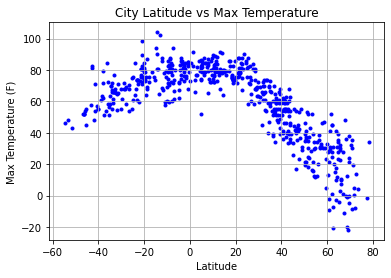

<Figure size 432x288 with 0 Axes>

In [111]:
# Make a scatter plot showing latitude vs max temp using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max Temp"]
plt.scatter(x_axis, y_axis, marker=".", color="blue")
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("latitude_vs_temperature.png")

## Latitude vs. Humidity Plot

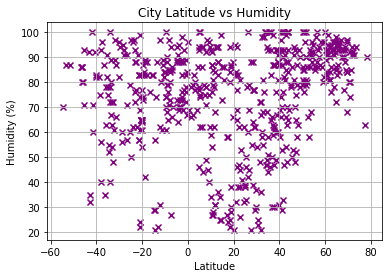

<Figure size 432x288 with 0 Axes>

In [112]:
# Make a scatter plot showing latitude vs humidity using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]
plt.scatter(x_axis, y_axis, marker="x", color="purple")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("latitude_vs_humidity.png")

## Latitude vs. Cloudiness Plot

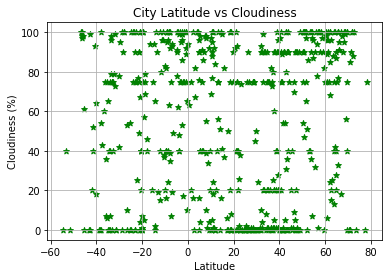

<Figure size 432x288 with 0 Axes>

In [113]:
# Make a scatter plot showing latitude vs humidity using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="*", color="green",)
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("latitude_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

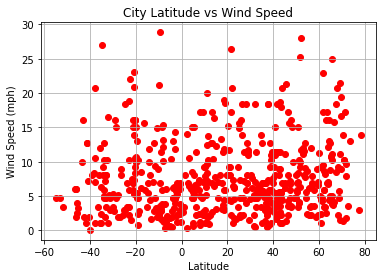

<Figure size 432x288 with 0 Axes>

In [114]:
# Make a scatter plot showing latitude vs humidity using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", color="red",)
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("latitude_vs_wind_speed.png")

## Linear Regression

In [115]:
# Calculate the linear regression model for the northern hemisphere and southern hemishpere separately
# Use the loc on latitude to find the cities that have latitude greater than 0 (north) and less than 0 (south)
x_values_north = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values_north = clean_city_data.loc[clean_city_data["Lat"] > 0]["Max Temp"]
x_values_south = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values_south = clean_city_data.loc[clean_city_data["Lat"] < 0]["Max Temp"]

# Perform the linear regression using linregress on the north values and then on the south values
(slope_north_temp, int_north_temp, rvalue_north_temp, pvalue_north_temp, stderr_north_temp) = linregress(x_values_north, y_values_north)
(slope_south_temp, int_south_temp, rvalue_south_temp, pvalue_south_temp, stderr_south_temp) = linregress(x_values_south, y_values_south)

# Print out a statement for the correlation coefficient
print(f"The correlation coefficient is {round(rvalue_north_temp,3)} for the northern hemisphere maximum temperatures.")
print(f"The correlation coefficient is {round(rvalue_south_temp,3)} for the southern hemisphere maximum temperatures.")
print("-----------------------")

# Print out the two equations for the linear model
regress_values_north = x_values_north * slope_north_temp + int_north_temp
line_eq_north = "y = " + str(round(slope_north_temp,2)) + "x +" + str(round(int_north_temp,2))
print(f"The least squares regression line for northern hemisphere cities is given by {line_eq_north}.")
regress_values_south = x_values_south * slope_south_temp + int_south_temp
line_eq_south = "y = " + str(round(slope_south_temp,2)) + "x +" + str(round(int_south_temp,2))
print(f"The least squares regression line for southern hemisphere cities is given by {line_eq_south}.")

The correlation coefficient is -0.885 for the northern hemisphere maximum temperatures.
The correlation coefficient is 0.63 for the southern hemisphere maximum temperatures.
-----------------------
The least squares regression line for northern hemisphere cities is given by y = -1.15x +95.73.
The least squares regression line for southern hemisphere cities is given by y = 0.53x +82.71.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8854488056747379


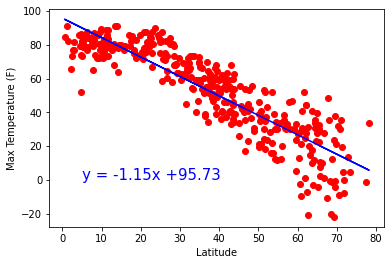

<Figure size 432x288 with 0 Axes>

In [116]:
# Create scatter plot for the northern hemisphere cities measuring the latitude vs max temperature
# Include the line of best fit on the plot as well
print(f"The r-value is: {rvalue_north_temp}")
plt.scatter(x_values_north, y_values_north, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(x_values_north, regress_values_north, "b-")
plt.annotate(line_eq_north,(5,0),fontsize=15,color="blue")
plt.show()
plt.savefig("northern_latitude_vs_temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6303773257046995


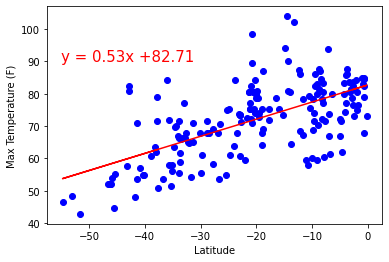

<Figure size 432x288 with 0 Axes>

In [117]:
# Create scatter plot for the southern hemisphere cities measuring the latitude vs max temperature
# Include the line of best fit on the plot as well
print(f"The r-value is: {rvalue_south_temp}")
plt.scatter(x_values_south, y_values_south, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(x_values_south, regress_values_south, "r-")
plt.annotate(line_eq_south,(-55,90),fontsize=15,color="red")
plt.show()
plt.savefig("southern_latitude_vs_temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3767977890554269


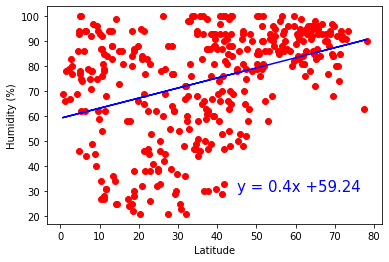

<Figure size 432x288 with 0 Axes>

In [118]:
# Calculate the linear regression model for humidity in northern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Humidity"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq, (45,30), fontsize=15, color="blue")
plt.show()
plt.savefig("northern_latitude_vs_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0554417317480078


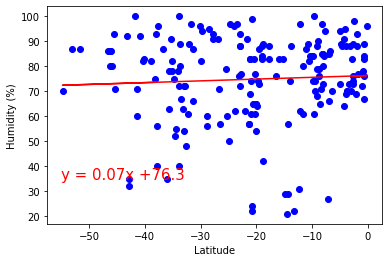

<Figure size 432x288 with 0 Axes>

In [119]:
# Calculate the linear regression model for humidity in southern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Humidity"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,35), fontsize=15, color="red")
plt.show()
plt.savefig("southern_latitude_vs_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19901007738919244


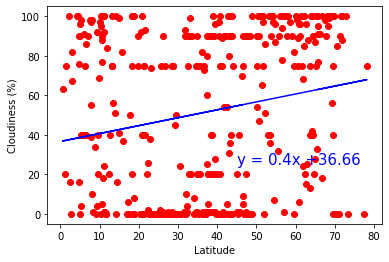

<Figure size 432x288 with 0 Axes>

In [120]:
# Calculate the linear regression model for cloudiness in northern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Cloudiness"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq, (45,25), fontsize=15, color="blue")
plt.show()
plt.savefig("northern_latitude_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2585819218143474


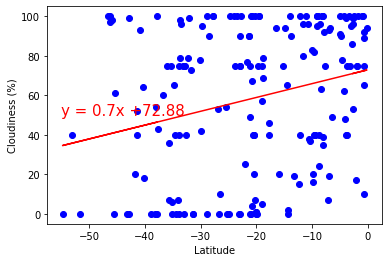

<Figure size 432x288 with 0 Axes>

In [121]:
# Calculate the linear regression model for cloudiness in southern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Cloudiness"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,50), fontsize=15, color="red")
plt.show()
plt.savefig("southern_latitude_vs_cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11316990861778674


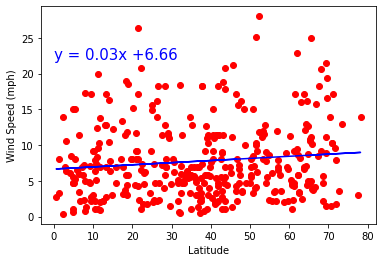

<Figure size 432x288 with 0 Axes>

In [123]:
# Calculate the linear regression model for wind speed in northern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Wind Speed"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq, (0,22), fontsize=15, color="blue")
plt.show()
plt.savefig("northern_latitude_vs_wind_speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.05961758877361497


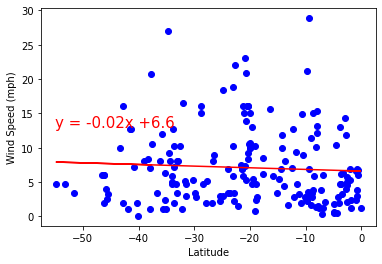

<Figure size 432x288 with 0 Axes>

In [124]:
# Calculate the linear regression model for wind speed in southern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Wind Speed"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,13), fontsize=15, color="red")
plt.show()
plt.savefig("southern_latitude_vs_wind_speed.png")